<a href="https://colab.research.google.com/github/pascalisnala/COVID-19-Analysis/blob/master/Temperature_Variation_and_Humidity_impact_to_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Temperature and Humidity Variation Impact to COVID-19</h2>
<p>In this kernel we do an analysis from the data of viruses that affect the world today, COVID-19. We are trying to find non-pharmaceutical interventions that affect this virus. Our focus is on finding the relationship between temperature and humidity variations with the spread of this virus <p>
    
<p><b>Kernel Outline:</b></p>
<ul>
    0. Library and Data Import <br>
    1. Data Preprocessing<br>
    2. Exploratory Data Analysis (EDA)<br>
    3. Feature Engineering<br>
    4. Modeling<br>
    5. Conclusion<br>
</ul>

<h3>0. Library and Data Import</h3>
<p>Importing the resource we need for further analysis and modeling</p>

<p><b>0.1. Library Import</b></p>

In [1]:
# dataframe
import pandas as pd

# matrix and math
import numpy as np

# visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# machine learning
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<p><b>0.2. Data Import</b></p>

In [0]:
# covid-19 dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# weather dataset
df_humidity = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/COVID-19-Analysis/master/Datasets/humidity.csv")
df_max_temperature = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/COVID-19-Analysis/master/Datasets/tMax.csv")
df_min_temperature = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/COVID-19-Analysis/master/Datasets/tMin.csv")

<br>
<h3>1. Data Preprocessing</h3>
<p>Recognize and understanding the structure of the data to be used. Changes in data structure are made if necessary </p>

In [0]:
df_confirmed.sample(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
61,Hong Kong,China,22.300,114.2000,0,2,2,5,8,8,8,10,10,12,13,15,15,17,21,24,25,26,29,38,49,50,53,56,56,57,60,62,63,68,68,69,74,79,84,91,92,94,95,96,100,100,105,105,107,108,114,115,120,126,129,134,140,145,155,162,181,208,256,273,317,356,386,410,453,519,561,641,682,714,765,802,845,862
208,NaN,Tanzania,-6.369,34.8888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,6,6,6,12,12,12,12,13,13,14,14,19,19,20,20,20,20


In [0]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  81 non-null     object 
 1   Country/Region  259 non-null    object 
 2   Lat             259 non-null    float64
 3   Long            259 non-null    float64
 4   1/22/20         259 non-null    int64  
 5   1/23/20         259 non-null    int64  
 6   1/24/20         259 non-null    int64  
 7   1/25/20         259 non-null    int64  
 8   1/26/20         259 non-null    int64  
 9   1/27/20         259 non-null    int64  
 10  1/28/20         259 non-null    int64  
 11  1/29/20         259 non-null    int64  
 12  1/30/20         259 non-null    int64  
 13  1/31/20         259 non-null    int64  
 14  2/1/20          259 non-null    int64  
 15  2/2/20          259 non-null    int64  
 16  2/3/20          259 non-null    int64  
 17  2/4/20          259 non-null    int

In [0]:
df_deaths.sample(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,4,5,5,10,12,20,24,43,58,76,106,136,179,213,276,356,434,546,639,771,864,1039,1173,1339,1487,1651
165,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  81 non-null     object 
 1   Country/Region  259 non-null    object 
 2   Lat             259 non-null    float64
 3   Long            259 non-null    float64
 4   1/22/20         259 non-null    int64  
 5   1/23/20         259 non-null    int64  
 6   1/24/20         259 non-null    int64  
 7   1/25/20         259 non-null    int64  
 8   1/26/20         259 non-null    int64  
 9   1/27/20         259 non-null    int64  
 10  1/28/20         259 non-null    int64  
 11  1/29/20         259 non-null    int64  
 12  1/30/20         259 non-null    int64  
 13  1/31/20         259 non-null    int64  
 14  2/1/20          259 non-null    int64  
 15  2/2/20          259 non-null    int64  
 16  2/3/20          259 non-null    int64  
 17  2/4/20          259 non-null    int

In [0]:
df_recovered.sample(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229,NaN,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [0]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  66 non-null     object 
 1   Country/Region  245 non-null    object 
 2   Lat             245 non-null    float64
 3   Long            245 non-null    float64
 4   1/22/20         245 non-null    int64  
 5   1/23/20         245 non-null    int64  
 6   1/24/20         245 non-null    int64  
 7   1/25/20         245 non-null    int64  
 8   1/26/20         245 non-null    int64  
 9   1/27/20         245 non-null    int64  
 10  1/28/20         245 non-null    int64  
 11  1/29/20         245 non-null    int64  
 12  1/30/20         245 non-null    int64  
 13  1/31/20         245 non-null    int64  
 14  2/1/20          245 non-null    int64  
 15  2/2/20          245 non-null    int64  
 16  2/3/20          245 non-null    int64  
 17  2/4/20          245 non-null    int

In [0]:
df_humidity.sample(2)

,Province/State,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
167,Chongqing,China,30.0572,107.8740,71,78,71,78,84,95,80,84,79,83,84,79,78,71,74,81,75,77,85,76,73,81,88,89,91,84,75,75,74,71,73,83,90,90,77,81,...,74,82,80,76,79,87,98,84,68,69,75,82,86,84,79,88,87,88,79,98,84,74,84,93,85,75,81,80,82,94,74,76,72,83,81,75,68,81,70,59
128,Wisconsin,US,44.2685,-89.6165,86,84,87,83,86,85,76,73,64,87,84,71,82,90,89,89,72,82,88,87,86,83,88,92,94,91,89,87,85,87,87,90,83,83,79,67,...,81,88,86,85,83,69,69,78,73,77,78,72,71,70,82,79,80,75,71,69,62,66,75,72,81,72,83,71,69,66,83,71,89,91,56,61,65,76,54,80


In [0]:
df_humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  322 non-null    object 
 1   Country/Region  468 non-null    object 
 2   Lat             468 non-null    float64
 3   Long            468 non-null    float64
 4   1/1/20          468 non-null    int64  
 5   1/2/20          468 non-null    int64  
 6   1/3/20          468 non-null    int64  
 7   1/4/20          468 non-null    int64  
 8   1/5/20          468 non-null    int64  
 9   1/6/20          468 non-null    int64  
 10  1/7/20          468 non-null    int64  
 11  1/8/20          468 non-null    int64  
 12  1/9/20          468 non-null    int64  
 13  1/10/20         468 non-null    int64  
 14  1/11/20         468 non-null    int64  
 15  1/12/20         468 non-null    int64  
 16  1/13/20         468 non-null    int64  
 17  1/14/20         468 non-null    int

In [0]:
df_max_temperature.sample(2)

,Province/State,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
294,"Jefferson County, WA",US,47.7425,-123.3040,2,0,-1,2,-3,-3,2,0,-6,-4,-1,-3,-4,-7,-10,-7,-6,-5,0,2,0,-2,0,2,-1,1,-1,0,0,1,2,4,0,-4,-4,-3,...,-2,1,2,2,2,0,-1,0,-3,-1,0,2,4,2,0,-3,0,2,0,5,2,-2,-2,2,1,-1,0,-2,-3,-3,0,1,0,0,-3,-4,0,8,4,4
366,"Montgomery, TX",US,30.3883,-95.6963,16,14,16,17,19,23,23,18,20,23,23,10,14,15,21,24,24,21,20,14,16,15,12,15,17,19,21,17,17,11,12,13,19,25,23,26,...,19,22,24,11,11,12,16,19,23,26,26,12,9,12,17,18,22,20,11,14,21,23,22,26,27,21,22,22,18,22,23,27,27,28,28,27,26,25,28,28


In [0]:
df_max_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  322 non-null    object 
 1   Country/Region  468 non-null    object 
 2   Lat             468 non-null    float64
 3   Long            468 non-null    float64
 4   1/1/20          468 non-null    int64  
 5   1/2/20          468 non-null    int64  
 6   1/3/20          468 non-null    int64  
 7   1/4/20          468 non-null    int64  
 8   1/5/20          468 non-null    int64  
 9   1/6/20          468 non-null    int64  
 10  1/7/20          468 non-null    int64  
 11  1/8/20          468 non-null    int64  
 12  1/9/20          468 non-null    int64  
 13  1/10/20         468 non-null    int64  
 14  1/11/20         468 non-null    int64  
 15  1/12/20         468 non-null    int64  
 16  1/13/20         468 non-null    int64  
 17  1/14/20         468 non-null    int

In [0]:
df_min_temperature.sample(2)

,Province/State,Country/Region,Lat,Long,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
166,Jiangsu,China,32.9711,119.4550,3,6,4,3,8,7,0,1,3,2,-1,1,0,-2,0,0,0,0,0,0,4,4,3,2,3,2,0,0,-1,-3,-1,1,2,0,0,0,...,3,6,5,4,10,4,-3,-3,-3,0,0,4,4,1,8,11,4,1,5,5,5,1,2,4,0,1,6,5,9,6,4,5,8,1,4,5,7,9,11,5
187,Xinjiang,China,41.1129,85.2401,-11,-13,-12,-10,-13,-11,-9,-10,-12,-11,-10,-9,-8,-7,-8,-7,-5,-5,-8,-8,-9,-6,-8,-9,-10,-10,-10,-10,-9,-8,-10,-10,-10,-9,-9,-9,...,-7,-8,-6,-3,-2,-2,-6,-4,-7,-4,-6,-6,-5,-5,-2,0,-1,-1,3,1,0,0,-1,0,0,0,2,4,-5,-5,-4,0,-2,-3,0,1,0,0,2,2


In [0]:
df_min_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  322 non-null    object 
 1   Country/Region  468 non-null    object 
 2   Lat             468 non-null    float64
 3   Long            468 non-null    float64
 4   1/1/20          468 non-null    int64  
 5   1/2/20          468 non-null    int64  
 6   1/3/20          468 non-null    int64  
 7   1/4/20          468 non-null    int64  
 8   1/5/20          468 non-null    int64  
 9   1/6/20          468 non-null    int64  
 10  1/7/20          468 non-null    int64  
 11  1/8/20          468 non-null    int64  
 12  1/9/20          468 non-null    int64  
 13  1/10/20         468 non-null    int64  
 14  1/11/20         468 non-null    int64  
 15  1/12/20         468 non-null    int64  
 16  1/13/20         468 non-null    int64  
 17  1/14/20         468 non-null    int

<p>After looking at the structure of the data that we have, the following is a few information that we get: </p>
<ul>
    <li>Between COVID-19 data and weather data have a similar structure</li>
    <li>Each dataframe contains:</li>
    - <mark>Province/State</mark> column describe the province of the data contained in a row <br>
    - <mark>Country/Region</mark> column describe the Country of the data contained in a row <br>
    - <mark>Lat</mark> column describe the latitude of the specified province in related row<br>
    - <mark>Long</mark> column describe the longitude of the specified province in related row<br>
    - After those columns, will be followed by some columns formatted in time series data showing for each day 
    <li>Both COVID-19 and weather data, not all countries are available for each province data in it. This is indicated by many NaN values in the <mark>Province/State</mark> column</li>
    <li>Weather data consists more row than the COVID-19 data, this indicate that some province exists in the weather data may not available on the COVID-19 Data</li>
</ul>

<br>
<h3>2. Exploratory Data Analysis</h3>
<p>looking for insights from the data used to help build an optimize model later</p>

<p><b>2.1. COVID-19 Data Analysis</b></p>

In [0]:
# creating a country base number of cases, so it will be more easy to visualize
df_case_by_country = df_confirmed.copy()
df_case_by_country.drop(df_case_by_country.columns[0],axis=1,inplace=True)
df_case_by_country = df_case_by_country.groupby(df_case_by_country.columns[0]).sum()
df_case_by_country.sample(2)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Libya,26.3351,17.228331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,8,8,10,10,11,11,18
Gabon,-0.8037,11.609400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,4,5,5,6,6,7,7,7,7,7,16,18,21,21,21


In [0]:
df_case_by_country.drop(df_case_by_country.columns[:-1],axis=1,inplace=True)
df_case_by_country.sample(2)

,4/4/20
Country/Region,
Qatar,1325
San Marino,259


In [0]:
df_case_by_country.columns = ["Cumulative_Case"]
df_case_by_country.sort_values("Cumulative_Case",ascending=False,inplace=True)
df_case_by_country.reset_index(inplace=True)

In [0]:
# creating a country base number of death cases
df_death_by_country = df_deaths.copy()
df_death_by_country.drop(df_death_by_country.columns[0],axis=1,inplace=True)
df_death_by_country = df_death_by_country.groupby(df_death_by_country.columns[0]).sum()
df_death_by_country.sample(2)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Belarus,53.70980,27.953400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,4,5
Laos,19.85627,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_death_by_country.drop(df_death_by_country.columns[:-1],axis=1,inplace=True)
df_death_by_country.columns = ["Deaths"]
df_death_by_country.sort_values("Deaths",ascending=False,inplace=True)
df_death_by_country.reset_index(inplace=True)
df_death_by_country.sample(2)

,Country/Region,Deaths
137,New Zealand,1
145,Guinea-Bissau,0


In [0]:
# creating a country base number of recovered cases
df_recovered_by_country = df_recovered.copy()
df_recovered_by_country.drop(df_recovered_by_country.columns[0],axis=1,inplace=True)
df_recovered_by_country = df_recovered_by_country.groupby(df_recovered_by_country.columns[0]).sum()
df_recovered_by_country.head(2)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99


In [0]:
df_recovered_by_country.drop(df_recovered_by_country.columns[:-1],axis=1,inplace=True)
df_recovered_by_country.columns = ["Recovered"]
df_recovered_by_country.sort_values("Recovered",ascending=False,inplace=True)
df_recovered_by_country.reset_index(inplace=True)
df_recovered_by_country.head(2)

,Country/Region,Recovered
0,China,76946
1,Spain,34219


In [0]:
# combining the number of cases, death cases, and recovered cases into a single dataframe
df_by_country = df_case_by_country.merge(df_death_by_country,how="left",left_on="Country/Region",right_on="Country/Region")
df_by_country = df_by_country.merge(df_recovered_by_country,how="left",left_on="Country/Region",right_on="Country/Region")
df_by_country.head(2)

,Country/Region,Cumulative_Case,Deaths,Recovered
0,US,308850,8407,14652
1,Spain,126168,11947,34219


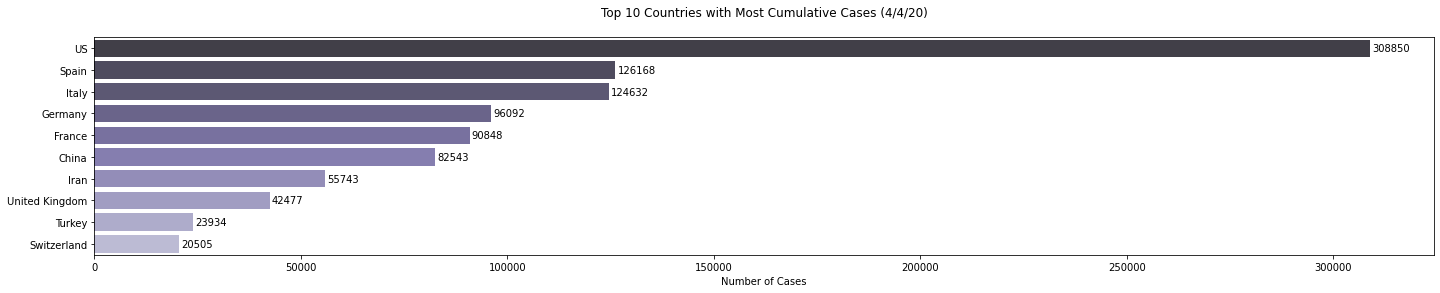

In [0]:
fig, ax = plt.subplots(figsize=(24,4))
ax = sns.barplot(x="Cumulative_Case", y="Country/Region", data=df_case_by_country.head(10),palette="Purples_d")
for index, values in enumerate(df_case_by_country.head(10).Cumulative_Case.values):
    ax.text(values+500,index,str(values),va="center")
title = "Top 10 Countries with Most Cumulative Cases (" + df_confirmed.columns[-1] +")\n"
ax.set_title(title)
ax.set_xlabel("Number of Cases")
ax.set_ylabel("")
plt.show()

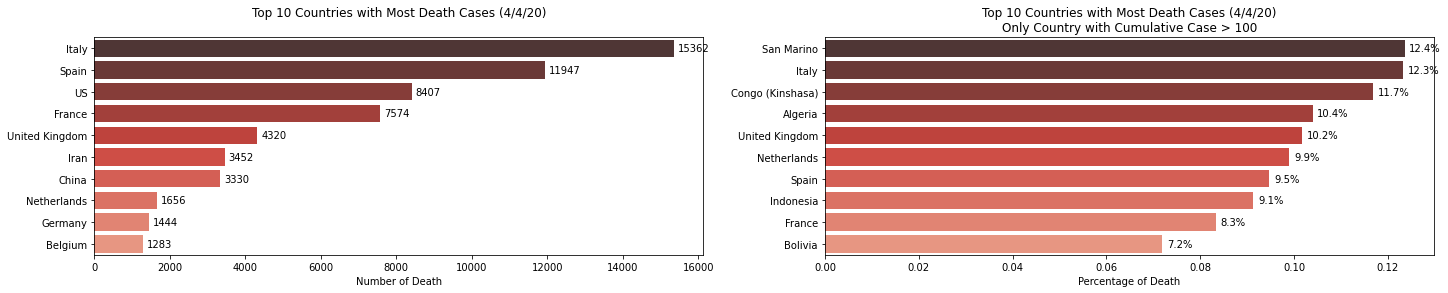

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24,4))

#ax1
plot_data = df_death_by_country.head(10)
sns.barplot(x="Deaths", y="Country/Region",data=plot_data, palette="Reds_d",ax=ax1)
for index, values in enumerate(plot_data.Deaths.values):
    ax1.text(values+100,index,str(values),va="center")
title = "Top 10 Countries with Most Death Cases (" + df_deaths.columns[-1] +")\n"
ax1.set_title(title)
ax1.set_xlabel("Number of Death")
ax1.set_ylabel("")

#ax2
df_by_country["Percent of Death"] = df_by_country.Deaths.values/df_by_country.Cumulative_Case.values
plot_data = df_by_country[df_by_country["Cumulative_Case"]>=100].sort_values("Percent of Death",ascending=False).head(10)
sns.barplot(x="Percent of Death", y="Country/Region", data=plot_data, palette="Reds_d",ax=ax2)
for index, values in enumerate(plot_data["Percent of Death"].values):
    ax2.text(values+.001,index,str(f'{values*100:.1f}%'),va="center")
title = "Top 10 Countries with Most Death Cases (" + df_deaths.columns[-1] +")\nOnly Country with Cumulative Case > 100"
ax2.set_title(title)
ax2.set_xlabel("Percentage of Death")
ax2.set_ylabel("")

plt.show()

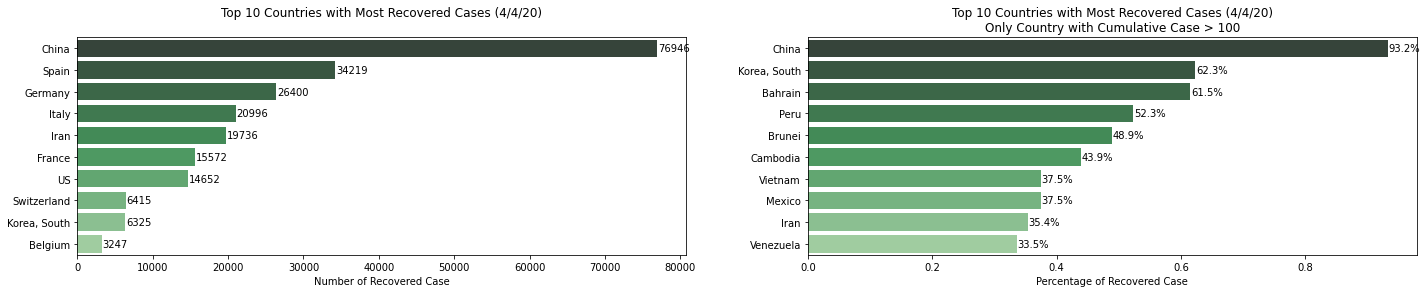

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24,4))

#ax1
plot_data = df_recovered_by_country.head(10)
sns.barplot(x="Recovered", y="Country/Region",data=plot_data, palette="Greens_d",ax=ax1)
for index, values in enumerate(plot_data.Recovered.values):
    ax1.text(values+100,index,str(values),va="center")
title = "Top 10 Countries with Most Recovered Cases (" + df_recovered.columns[-1] +")\n"
ax1.set_title(title)
ax1.set_xlabel("Number of Recovered Case")
ax1.set_ylabel("")

#ax2
df_by_country["Percent of Recovery"] = df_by_country.Recovered.values/df_by_country.Cumulative_Case.values
plot_data = df_by_country[(df_by_country["Cumulative_Case"]>=100) & (df_by_country["Country/Region"]!="Diamond Princess")].sort_values("Percent of Recovery",ascending=False).head(10)
sns.barplot(x="Percent of Recovery", y="Country/Region", data=plot_data, palette="Greens_d",ax=ax2)
for index, values in enumerate(plot_data["Percent of Recovery"].values):
    ax2.text(values+.001,index,str(f'{values*100:.1f}%'),va="center")
title = "Top 10 Countries with Most Recovered Cases (" + df_deaths.columns[-1] +")\nOnly Country with Cumulative Case > 100"
ax2.set_title(title)
ax2.set_xlabel("Percentage of Recovered Case")
ax2.set_ylabel("")

plt.show()

From the data visualization above, we can see that:
<ul>
    <li>United States is the only country from America Continent to exist in the top 10 most cumulative cases, Asia have 2 countries which is Iran and China, and the rest is from Europe</li>
    <li>Indonesia is the only Asia Continent Country which appear in the top 10 highest death case percentage, 2 countries are from Africa, the rest is from Europe</li>
    <li>Denmark is the only Europe Continent Country which appear in the top 10 highest recovered case percantage, 3 countries are from America, the rest is from Asia</li>
</ul>

<p><b>2.2. Relationship between weather and COVID-19 Data Analysis</b></p>

In [0]:
df_top10_cumulativecase = df_case_by_country.head(10)["Country/Region"].values

df_humidity_by_country = df_humidity.copy()
df_humidity_by_country.drop(df_humidity_by_country.columns[0],axis=1,inplace=True)
df_humidity_by_country.drop(df_humidity_by_country.columns[1:3],axis=1,inplace=True)
df_humidity_by_country = df_humidity_by_country.groupby(df_humidity_by_country.columns[0]).mean()
df_humidity_by_country.reset_index(inplace=True)
df_humidity_by_country.sample(2)

,Country/Region,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
14,Belarus,85.0,93.0,85.0,90.0,87.0,81.0,92.0,87.0,92.0,96.0,90.0,89.0,91.0,90.0,82.0,83.0,90.0,85.0,86.0,86.0,89.0,86.0,76.0,84.0,83.0,84.0,86.0,89.0,92.0,89.0,95.0,95.0,87.0,81.0,78.0,63.0,77.0,57.0,82.0,84.0,81.0,88.0,88.0,87.0,86.0,84.0,80.0,68.0,74.0,75.0,82.0,78.0,73.0,69.0,76.0,84.0,81.0,86.0,76.0,76.0,79.0,85.0,85.0,82.0,86.0,85.0,87.0,83.0,80.0,82.0,83.0,75.0,67.0,72.0,57.0,53.0,75.0,73.0,70.0
126,Serbia,90.0,89.0,79.0,76.0,85.0,79.0,75.0,72.0,75.0,70.0,80.0,89.0,87.0,82.0,82.0,84.0,82.0,77.0,83.0,82.0,80.0,75.0,77.0,68.0,73.0,80.0,92.0,83.0,80.0,79.0,65.0,70.0,77.0,74.0,79.0,89.0,61.0,77.0,66.0,72.0,71.0,88.0,71.0,71.0,86.0,79.0,76.0,67.0,73.0,65.0,81.0,67.0,66.0,64.0,63.0,57.0,57.0,81.0,83.0,64.0,56.0,49.0,52.0,91.0,64.0,67.0,79.0,88.0,82.0,91.0,71.0,65.0,59.0,54.0,65.0,54.0,49.0,50.0,45.0


In [0]:
df_top10_humidity_by_country = df_humidity_by_country[df_humidity_by_country["Country/Region"].isin(df_top10_cumulativecase)]
df_top10_humidity_by_country.set_index("Country/Region",inplace=True)
df_top10_humidity_by_country.T.sample(2)

Country/Region,China,France,Germany,Iran,Italy,Spain,Switzerland,Turkey,US,United Kingdom
1/28/20,69.242424,84.111111,85.0,42.0,79.0,80.0,91.0,68.0,78.684211,80.5
2/15/20,69.121212,81.888889,88.0,28.0,60.0,76.0,69.0,73.0,64.975709,89.5


In [0]:
df_min_temperature_by_country = df_min_temperature.copy()
df_min_temperature_by_country.drop(df_min_temperature_by_country.columns[0],axis=1,inplace=True) 
df_min_temperature_by_country.drop(df_min_temperature_by_country.columns[1:3],axis=1,inplace=True)
df_min_temperature_by_country = df_min_temperature_by_country.groupby(df_min_temperature_by_country.columns[0]).mean()
df_min_temperature_by_country.reset_index(inplace=True)
df_min_temperature_by_country.sample(2)

,Country/Region,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
133,Spain,-1.0,0.0,0.0,-2.0,-2.0,-2.0,-1.0,0.0,1.0,-1.0,-3.0,-3.0,-4.0,1.0,3.0,7.0,4.0,5.0,2.0,4.0,4.0,1.0,4.0,6.0,4.0,1.0,9.0,9.0,7.0,8.0,11.0,7.0,4.0,4.0,2.0,1.0,3.0,3.0,2.0,4.0,4.0,7.0,5.0,2.0,1.0,2.0,4.0,4.0,2.0,0.0,1.0,1.0,2.0,2.0,4.0,3.0,2.0,2.0,7.0,7.0,11.0,4.0,10.0,9.0,5.0,3.0,0.0,3.0,3.0,6.0,9.0,9.0,7.0,7.0,4.0,1.0,5.0,6.0,6.0
65,Hungary,-4.0,-4.0,-3.0,1.0,-5.0,-5.0,-6.0,-5.0,-4.0,-3.0,-2.0,-3.0,-1.0,-3.0,-1.0,-1.0,-3.0,-1.0,-1.0,-2.0,-3.0,-3.0,-4.0,-4.0,-2.0,0.0,-3.0,0.0,0.0,0.0,4.0,8.0,10.0,5.0,2.0,-2.0,1.0,-4.0,-4.0,1.0,3.0,2.0,0.0,5.0,1.0,0.0,2.0,4.0,0.0,2.0,0.0,-1.0,3.0,6.0,1.0,7.0,1.0,1.0,-2.0,4.0,7.0,8.0,5.0,0.0,3.0,2.0,3.0,0.0,0.0,5.0,6.0,9.0,2.0,0.0,-1.0,-1.0,3.0,4.0,5.0


In [0]:
df_top10_min_temperature_by_country = df_min_temperature_by_country[df_humidity_by_country["Country/Region"].isin(df_top10_cumulativecase)]
df_top10_min_temperature_by_country.set_index("Country/Region",inplace=True)
df_top10_min_temperature_by_country.T.sample(2)

Country/Region,China,France,Germany,Iran,Italy,Spain,Switzerland,Turkey,US,United Kingdom
3/11/20,3.909091,21.888889,8.0,1.0,4.0,9.0,2.0,4.0,5.753036,13.500000
1/19/20,-3.272727,20.888889,0.0,0.0,4.0,2.0,-7.0,-4.0,-1.497976,12.166667


In [0]:
df_max_temperature_by_country = df_max_temperature.copy()
df_max_temperature_by_country.drop(df_max_temperature_by_country.columns[0],axis=1,inplace=True)
df_max_temperature_by_country.drop(df_max_temperature_by_country.columns[1:3],axis=1,inplace=True)
df_max_temperature_by_country = df_max_temperature_by_country.groupby(df_max_temperature_by_country.columns[0]).mean()
df_max_temperature_by_country.reset_index(inplace=True)
df_max_temperature_by_country.sample(2)

,Country/Region,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
61,Guinea,34.0,33.0,31.0,31.0,32.0,33.0,34.0,35.0,35.0,36.0,34.0,35.0,35.0,34.0,34.0,36.0,36.0,36.0,36.0,37.0,36.0,34.0,36.0,35.0,37.0,36.0,36.0,36.0,36.0,37.0,37.0,37.0,36.0,36.0,36.0,36.0,36.0,35.0,36.0,36.0,36.0,35.0,36.0,36.0,36.0,36.0,38.0,38.0,37.0,38.0,39.0,38.0,39.0,38.0,38.0,38.0,39.0,39.0,38.0,38.0,39.0,38.0,38.0,38.0,39.0,39.0,39.0,39.0,39.0,37.0,37.0,39.0,39.0,39.0,38.0,38.0,38.0,37.0,38.0
52,Finland,3.0,4.0,3.0,0.0,-4.0,0.0,3.0,3.0,1.0,-1.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,3.0,4.0,-1.0,0.0,0.0,-2.0,-3.0,-8.0,-5.0,-2.0,-3.0,-5.0,-3.0,0.0,-2.0,-7.0,-2.0,-4.0,-2.0,1.0,1.0,3.0,2.0,2.0,2.0,-2.0,1.0,3.0,3.0,3.0,0.0,-4.0,2.0,4.0,2.0,0.0,0.0,-3.0,-2.0,-3.0,-4.0,-3.0,-4.0,-3.0,-1.0,2.0,-1.0,2.0,3.0,4.0,4.0,3.0,2.0,0.0,-4.0,2.0,1.0,1.0,5.0,4.0


In [0]:
df_top10_max_temperature_by_country = df_max_temperature_by_country[df_humidity_by_country["Country/Region"].isin(df_top10_cumulativecase)]
df_top10_max_temperature_by_country.set_index("Country/Region",inplace=True)
df_top10_max_temperature_by_country.T.sample(2)

Country/Region,China,France,Germany,Iran,Italy,Spain,Switzerland,Turkey,US,United Kingdom
2/17/20,7.181818,25.777778,9.0,22.0,17.0,15.0,6.0,0.0,10.323887,17.166667
2/7/20,6.393939,26.777778,5.0,18.0,14.0,14.0,4.0,4.0,8.562753,17.500000


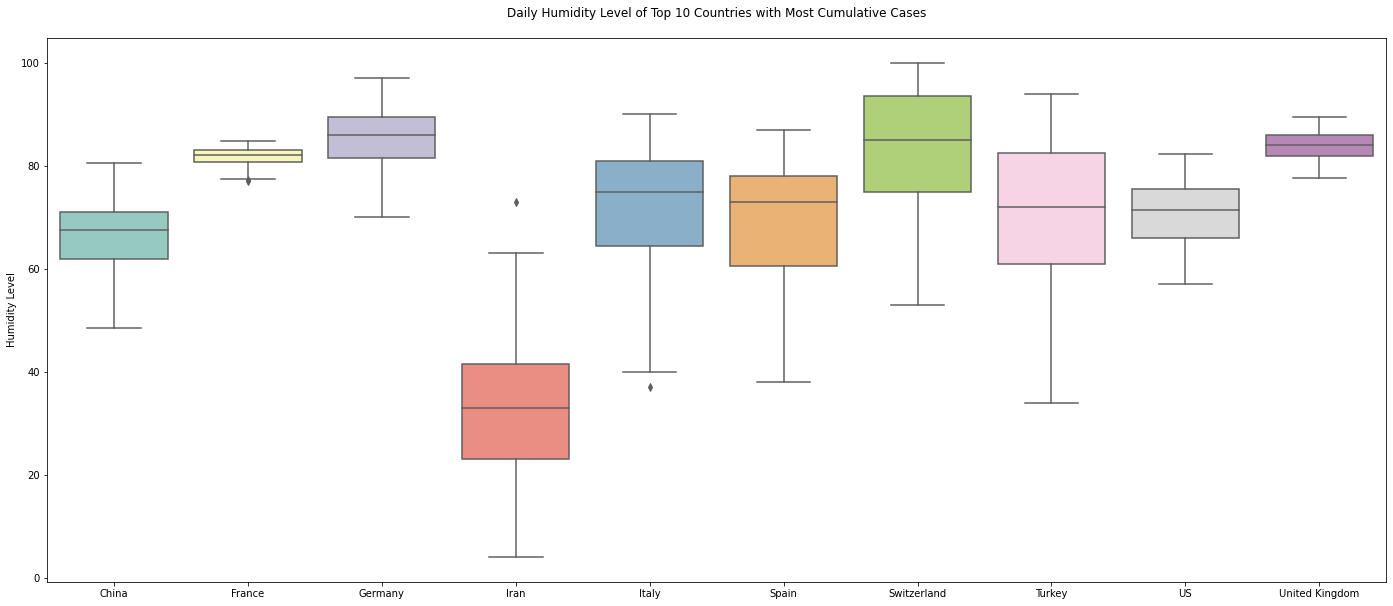

In [0]:
fig, ax = plt.subplots(figsize=(24,10))
ax = sns.boxplot(x="Country/Region", y="value", data=pd.melt(df_top10_humidity_by_country.T),palette="Set3")
ax.set_title("Daily Humidity Level of Top 10 Countries with Most Cumulative Cases\n")
ax.set_xlabel("")
ax.set_ylabel("Humidity Level")
plt.show()

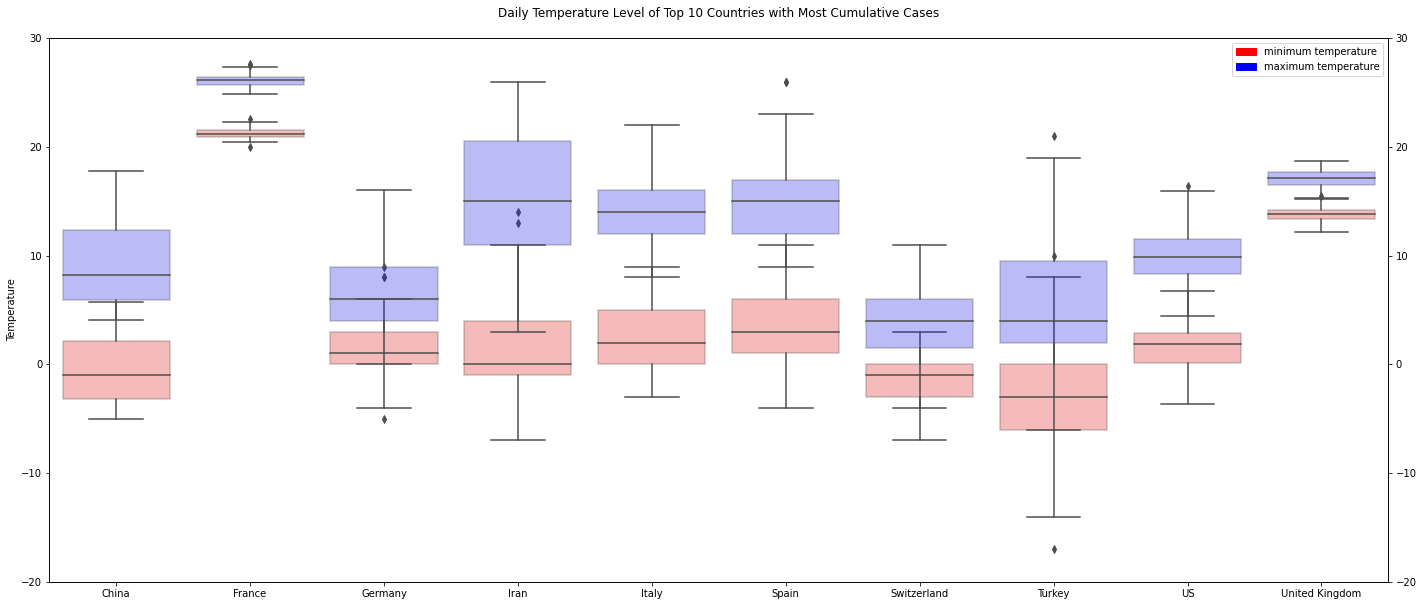

In [0]:
fig, ax = plt.subplots(figsize=(24,10))
ax1 = ax.twinx()

sns.boxplot(x="Country/Region", y="value", data=pd.melt(df_top10_min_temperature_by_country.T),color="red", boxprops=dict(alpha=.3),ax=ax)
sns.boxplot(x="Country/Region", y="value", data=pd.melt(df_top10_max_temperature_by_country.T),color="blue", boxprops=dict(alpha=.3),ax=ax1)


red_patch = mpatches.Patch(color='red', label='minimum temperature')
blue_patch = mpatches.Patch(color='blue', label='maximum temperature')
ax.legend(handles=[red_patch,blue_patch])

ax.set_title("Daily Temperature Level of Top 10 Countries with Most Cumulative Cases\n")
ax.set_xlabel("")
ax.set_ylabel('Temperature')
ax1.set_ylabel('')
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
ax.set(ylim=(-20, 30))
ax1.set(ylim=(-20, 30))



plt.show()

From the visualization of 2 charts above we can see that:
<ul> 
    <li>The humidity level of each countries which appear in the top 10 most cumulative case <b>tend to be similar</b>, it is always between 60 and 90 of humidity. <i> Iran </i> is the country with most different humidity level which seems to be lower than the other top 10 countries</li>
    <li>The temperature of each countries which appear in the top 10 most cumulative case are <b>relatively low</b>. Only <i>UK</i> and <i>France</i> which never hit 0 degrees celcius or lower, but both are still relatively low temperature as they never hit 30 degree celcius</li>
</ul>

<br>
<h3>3. Feature Engineering</h3>
<p>Preparing the proper input dataset, compatible with the machine learning algorithm requirements.</p>

In [0]:
# we are taking the median of each day humidity and temperature level
df_median_humidity_by_country = df_humidity_by_country.copy()
df_median_humidity_by_country.set_index("Country/Region",inplace=True)
df_median_humidity_by_country["humidity_median"] = df_median_humidity_by_country.median(axis=1)
df_median_humidity_by_country.drop(df_median_humidity_by_country.columns[:-1],axis=1,inplace=True)
df_median_humidity_by_country.reset_index(inplace=True)

df_median_max_temperature_by_country = df_max_temperature_by_country.copy()
df_median_max_temperature_by_country.set_index("Country/Region",inplace=True)
df_median_max_temperature_by_country["max_temp_median"] = df_median_max_temperature_by_country.median(axis=1)
df_median_max_temperature_by_country.drop(df_median_max_temperature_by_country.columns[:-1],axis=1,inplace=True)
df_median_max_temperature_by_country.reset_index(inplace=True)

df_median_min_temperature_by_country = df_min_temperature_by_country.copy()
df_median_min_temperature_by_country.set_index("Country/Region",inplace=True)
df_median_min_temperature_by_country["min_temp_median"] = df_median_min_temperature_by_country.median(axis=1)
df_median_min_temperature_by_country.drop(df_median_min_temperature_by_country.columns[:-1],axis=1,inplace=True)
df_median_min_temperature_by_country.reset_index(inplace=True)
df_median_min_temperature_by_country.sample(2)

,Country/Region,min_temp_median
28,Chad,15.0
121,Saint Lucia,22.0


We use a median not a mean because we feel that for temperature and humidity data, using a mean can cause biased results so that the numbers obtained do not represent the weather of the country.

In [0]:
# combine median data into a single dataframe
df_weather_data_by_country = df_median_humidity_by_country.merge(df_median_max_temperature_by_country,how="left",left_on="Country/Region",right_on="Country/Region")
df_weather_data_by_country = df_weather_data_by_country.merge(df_median_min_temperature_by_country,how="left",left_on="Country/Region",right_on="Country/Region")
df_weather_data_by_country.sample(2)

,Country/Region,humidity_median,max_temp_median,min_temp_median
1,Albania,73.0,12.0,2.0
133,Spain,73.0,15.0,3.0


In [0]:
# combine the median of weather data and the covid-19 data into a single dataframe
df_combined = df_by_country.merge(df_weather_data_by_country,how="left",left_on="Country/Region",right_on="Country/Region")
df_combined.drop(["Percent of Death","Percent of Recovery"],axis=1,inplace=True)
df_combined.sample(2)

,Country/Region,Cumulative_Case,Deaths,Recovered,humidity_median,max_temp_median,min_temp_median
160,Nepal,9,0,1,65.0,22.0,10.0
68,Cameroon,555,9,17,70.0,33.0,20.0


In [0]:
# as mentioned above in the preprocessing section, weather and covid-19 dataset both have different number of row.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country/Region   181 non-null    object 
 1   Cumulative_Case  181 non-null    int64  
 2   Deaths           181 non-null    int64  
 3   Recovered        181 non-null    int64  
 4   humidity_median  151 non-null    float64
 5   max_temp_median  151 non-null    float64
 6   min_temp_median  151 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 11.3+ KB


In [0]:
# here we need to drop the column which not available in both side as it become less useful for us
df_combined = df_combined.dropna(how='any',axis=0) 
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 172
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country/Region   151 non-null    object 
 1   Cumulative_Case  151 non-null    int64  
 2   Deaths           151 non-null    int64  
 3   Recovered        151 non-null    int64  
 4   humidity_median  151 non-null    float64
 5   max_temp_median  151 non-null    float64
 6   min_temp_median  151 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 9.4+ KB


In [0]:
df_combined.set_index("Country/Region",inplace=True)
df_combined.sample(2)

,Cumulative_Case,Deaths,Recovered,humidity_median,max_temp_median,min_temp_median
Country/Region,,,,,,
Paraguay,96,3,12,56.0,36.0,23.0
Moldova,752,12,29,74.0,8.0,0.0


Now the data is done and we are ready to jump into the next section. Machine Learning!

<br>
<h3>4. Modeling</h3>
<p>Preparing the proper input dataset, compatible with the machine learning algorithm requirements.</p>
<p>like our original goal, we want to see the effect that weather has on COVID-19. Now, we already know the median humidity and temperature variation in each country. In this section we try to use machine learning methods to cluster countries that have similar levels of humidity and temperature</p>
<p>To do that, we use K-Means clustering which we can easily found in Tensorflow</p>

<b>4.1. Model Building </b>

In [0]:
points = df_weather_data_by_country[df_weather_data_by_country.columns[1:]].values                            # data which we want to cluster (exclude the country name)

def input_fn():
    return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)      # converting array to tensor

num_clusters = 4                                                                                              # number of cluster, in this chance we use 4 cluster
kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=num_clusters, use_mini_batch=False)          # build the KMeans cluster object from tensorflow

# train
num_iterations = 50                                                                                           # 50 iteration to find the cluster centroid
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)                                                                                    # fit the model into the data
    
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))                                                # get the cluster for each row of the data

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpcjqjpse7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

<b>4.2. Model Visualization</b>

In [0]:
# now as we use 3 features for clustering, it won't easy to visualize
# so here, we use PCA to reduce the dimension so we can visualize the cluster more easily

x = df_weather_data_by_country[df_weather_data_by_country.columns[1:]].values
x = StandardScaler().fit_transform(x)                                                                         # scale the data with scikit-learn StandardScaler

pca = PCA(n_components=2)                                                                                     # build PCA object from scikit-learn PCA class. For now, we use 2 principal component
principal_component = pca.fit(x).transform(x)                                                                 # transform the data into their principal component form
principalDf = pd.DataFrame(data = principal_component,columns = ['pc1', 'pc2'])                               # build a dataframe from the principal component we got from the previous step

In [0]:
# combine the data of principal component and cluster into a single dataframe
df_weather_data_cluster_by_country = pd.concat([df_weather_data_by_country,principalDf],axis=1)
df_weather_data_cluster_by_country.head()
df_weather_data_cluster_by_country["cluster"] = cluster_indices

In [0]:
df_weather_data_cluster_by_country.sample(2)

,Country/Region,humidity_median,max_temp_median,min_temp_median,pc1,pc2,cluster
63,Holy See,73.0,15.0,4.0,0.721405,0.083663,2
25,Cameroon,70.0,33.0,20.0,-1.367739,-0.566501,3


In [0]:
df_combined_cluster = df_by_country.merge(df_weather_data_cluster_by_country,how="left",left_on="Country/Region",right_on="Country/Region")
df_combined_cluster.drop(["Percent of Death","Percent of Recovery"],axis=1,inplace=True)
df_combined_cluster = df_combined_cluster.dropna() 
df_combined_cluster.sample(2)

,Country/Region,Cumulative_Case,Deaths,Recovered,humidity_median,max_temp_median,min_temp_median,pc1,pc2,cluster
28,Malaysia,3483,57,915,95.0,29.0,21.0,-0.795234,-1.627239,3.0
156,Sudan,10,2,2,12.0,32.0,15.0,-1.938650,2.087374,0.0


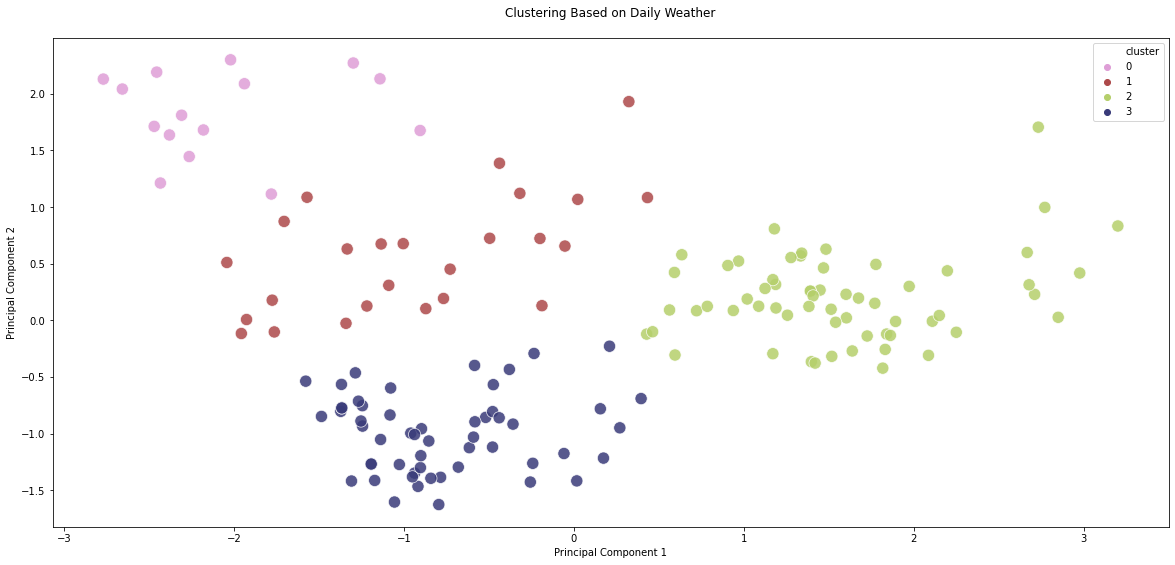

In [0]:
#@title Default title text
fig, ax = plt.subplots(figsize=(20,9))
sns.scatterplot(x="pc1", y="pc2", hue="cluster", data=df_weather_data_cluster_by_country, s=150, palette="tab20b_r", alpha=.85, ax=ax)
ax.set_title("Clustering Based on Daily Weather\n")
ax.set_ylabel("Principal Component 2")
ax.set_xlabel("Principal Component 1")
plt.show()

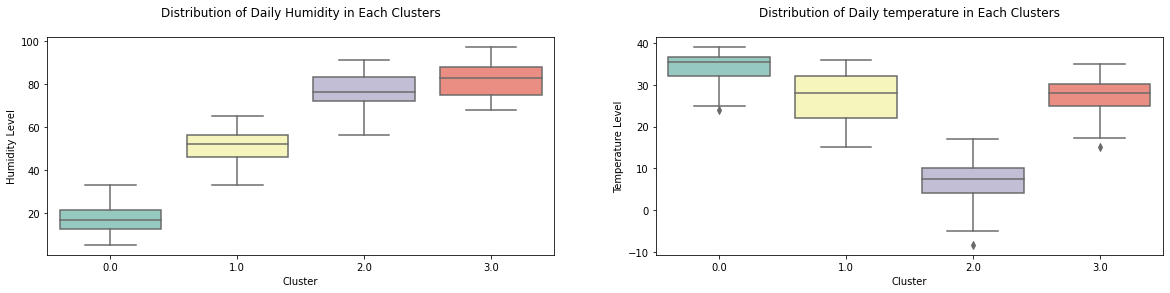

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(x="cluster", y="humidity_median", data=df_combined_cluster, palette="Set3", ax=ax1)
sns.boxplot(x="cluster", y="max_temp_median", data=df_combined_cluster, palette="Set3", ax=ax2)

ax1.set_title("Distribution of Daily Humidity in Each Clusters\n")
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Humidity Level")

ax2.set_title("Distribution of Daily temperature in Each Clusters\n")
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Temperature Level")

plt.show()

From the charts above we can see that we managed to divide the country into 4 different clusters. 
Each cluster has the following characteristic:
- Cluster 0 contain countries with low humidity level and high temperature level. This cluster has the lowest humidity level and the highest temperature
- Cluster 1 contain countries with medium level of humidity and quite high temperature level. This cluster also has a longest range of temperature level
- Cluster 2 contain countries with high humidity level and low temperature. This cluster has the lowest temperature level 
- Cluster 3 contain countries with high humidity level and high temperature. This cluster has slight higher humidity than the cluster 2

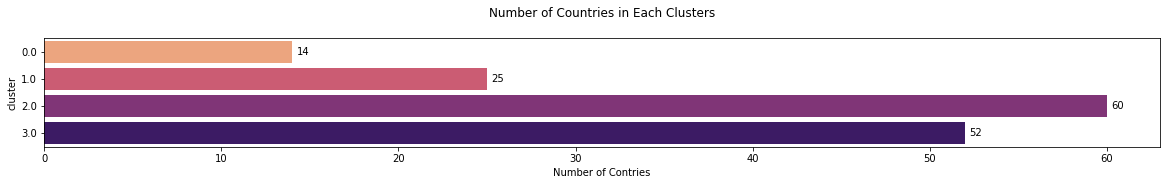

In [0]:
fig, ax = plt.subplots(figsize=(20,2))
sns.countplot(y="cluster", data=df_combined_cluster, palette="magma_r", ax=ax)
for index, values in enumerate(df_combined_cluster.cluster.value_counts().sort_index().values):
    ax.text(values+.25,index,str(values),va="center")
ax.set_title("Number of Countries in Each Clusters\n")
ax.set_xlabel("Number of Contries")
plt.show()

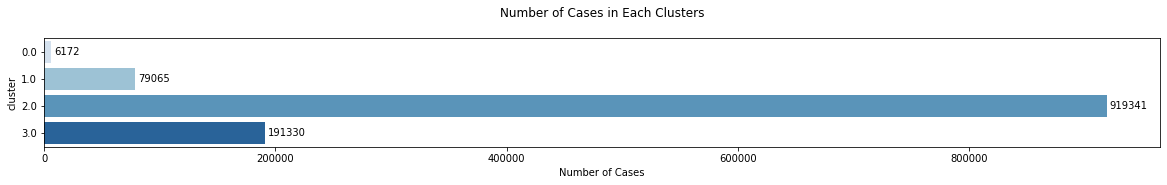

In [0]:
fig, ax = plt.subplots(figsize=(20,2))
sns.barplot(x="Cumulative_Case", y="cluster", data=df_combined_cluster[["Cumulative_Case","cluster"]].groupby("cluster",axis=0).sum().reset_index(), palette="Blues", orient="h", ax=ax)
for index, values in enumerate(df_combined_cluster[["Cumulative_Case","cluster"]].groupby("cluster",axis=0).sum().reset_index().Cumulative_Case):
    ax.text(values+2500,index,str(values),va="center")
ax.set_title("Number of Cases in Each Clusters\n")
ax.set_xlabel("Number of Cases")
plt.show()

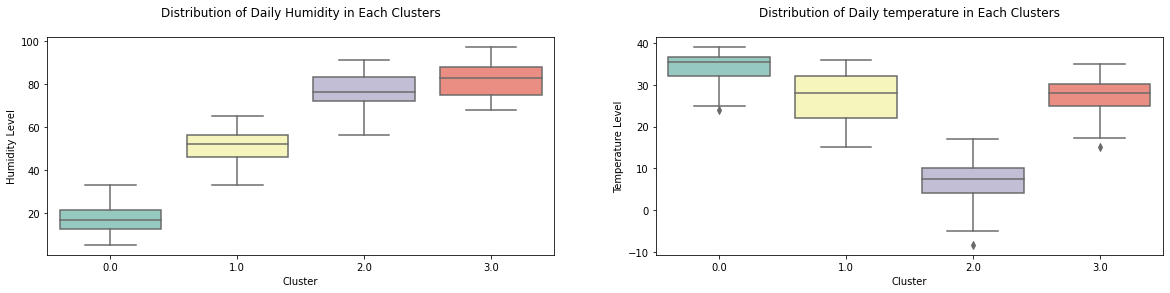

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(x="cluster", y="humidity_median", data=df_combined_cluster, palette="Set3", ax=ax1)
sns.boxplot(x="cluster", y="max_temp_median", data=df_combined_cluster, palette="Set3", ax=ax2)

ax1.set_title("Distribution of Daily Humidity in Each Clusters\n")
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Humidity Level")

ax2.set_title("Distribution of Daily temperature in Each Clusters\n")
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Temperature Level")

plt.show()

From the chart above we can see that:
- cluster 2 contain more country than any other cluster. Followed by cluster 3, 0, and cluster 1 has least
- although cluster 2 has 8 more countries than cluster 3, but the number of case in cluster 3 is much much more higher than the cluster 3. This is indicating that weather could affect the spread of COVID-19

<br>
<h3>5. Conclusion</h3>

*   Based on the result of the model, the number of case in a cluster containing 60 out of 151 countries is dominating other clusters. This cluster has around 79% of the total cases (919,341 cases)
*   This is indicating a certain weather circumstances are helping the virus to spread faster
*   From the result of the model, we believe that high humidity (around 60-90) and low temperature (around 0-12 degree celcius) are the ideal circumstances that may help the virus to spread faster

*   Our analysis is very limited with only attention to temperature and humidity. We believe that there are many other factors that can actually influence the development of this virus. Starting from state policy, lockdown enforcement, school closure, implementation of physical / social distancing and so on. Therefore this analysis is only to provide a picture as the weather in a country is able to affect the spread of COVID-19, but to ensure further study is required


